In [17]:
""" Initialize the notebook. """

%matplotlib inline
import matplotlib.pyplot as PP
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import os
import numpy as np
import time
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from PIL import Image
import dask
from dask.diagnostics import ProgressBar
import pandas as pd
from scipy import interpolate
import cmasher as cmr
from scipy.ndimage import gaussian_filter as gf
import xesmf

font = { 'family' : 'serif', 'size' : '10', 'weight' : 'normal'}
mpl.rc('font', **font)
mpl.rc('axes', labelweight = 'bold') # needed for bold axis labels in more recent version of matplotlib
print("{}: Working at {}".format(os.uname()[1], os.getcwd()))

flatten = lambda l: [item for sublist in l for item in sublist]

from Plot_NY97_library import *
%load_ext autoreload
%autoreload 2

login11: Working at /global/cfs/cdirs/m1517/cascade/indah/RESEARCH/CA_97_NY_event
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Setup folders and regex

root_ens = "/global/cscratch1/sd/arhoades/ROS_CALI/RRM_E3SM/data/regrid/ensavg"

start_dates = ["1996-12-31-00", "1997-01-01-00", "1997-01-02-00", "1997-01-03-00"]
dates = xr.cftime_range(start="1996-12-31 00", end="1997-01-03 18", freq="24H")
resolutions = ["ne0wus30x8", "ne0wus30x16", "ne0wus30x32", ]

In [19]:
ERA5_sfc = xr.open_dataset("data/era5_sf.nc")
ERA5_p = xr.open_dataset("data/era5_p.nc")
E3SM_sfc = xr.open_dataset("data/e3sm_sf.nc")
E3SM_p = xr.open_dataset("data/e3sm_p.nc")

In [20]:
resolutions = ["ERA5", "ne0wus30x8", "ne0wus30x16", "ne0wus30x32", ]
ylabels = ["ERA5 ", "RRM-E3SM (14 km)", "RRM-E3SM (7 km)", "RRM-E3SM (3.5 km)"]
DataSets =  [ERA5_sfc, E3SM_sfc, E3SM_sfc, E3SM_sfc]
DataSets2 = [ERA5_p, E3SM_p, E3SM_p, E3SM_p]

## IVT and Z

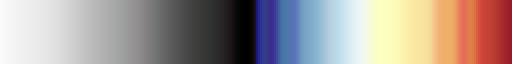

In [21]:
sat_cmap

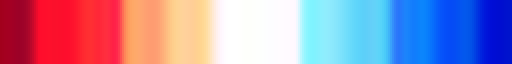

In [22]:
bwr_cmap

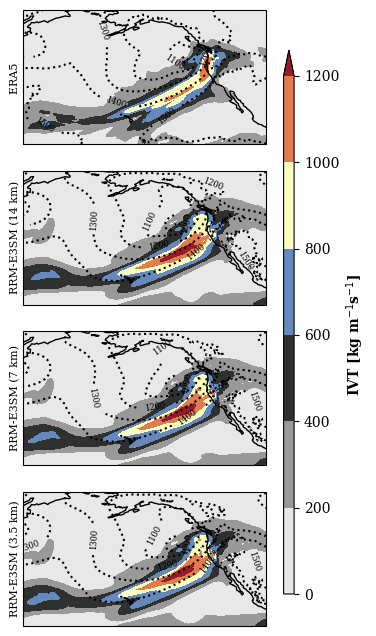

In [7]:
fig,ts = plot_ivt(DataSets, DataSets2, resolutions, ylabels)
fig.savefig("plots/IVT_Z_{}.png".format(ts), dpi=300, bbox_inches="tight")
# fig.savefig("plots/IVT_Z_{}.pdf".format(ts), dpi=300, bbox_inches="tight")

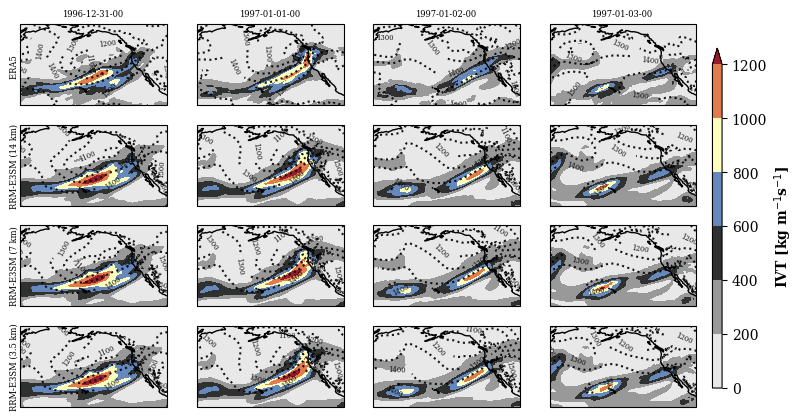

In [8]:
fig = plot_ivt_times(DataSets, DataSets2, resolutions, ylabels, start_dates)
fig.savefig("plots/IVT_Z.png", dpi=300, bbox_inches="tight")
# fig.savefig("plots/IVT_Z.pdf", dpi=300, bbox_inches="tight")

In [9]:
%%time

data = [E3SM_sfc.IVT.sel(res="ne0wus30x8").isel(time=1)  - ERA5_sfc.IVT.sel(res="ERA5").isel(time=1), \
        E3SM_sfc.IVT.sel(res="ne0wus30x16").isel(time=1) - ERA5_sfc.IVT.sel(res="ERA5").isel(time=1), \
        E3SM_sfc.IVT.sel(res="ne0wus30x32").isel(time=1) - ERA5_sfc.IVT.sel(res="ERA5").isel(time=1), \
       ]
data2 = [E3SM_p.Z.sel(res="ne0wus30x8" ).isel(time=1).rename({"lon":"x", "lat":"y"}).rio.write_crs("epsg:4326", inplace=True).rio.interpolate_na().rename({"x":"lon", "y":"lat"}), \
         E3SM_p.Z.sel(res="ne0wus30x16").isel(time=1).rename({"lon":"x", "lat":"y"}).rio.write_crs("epsg:4326", inplace=True).rio.interpolate_na().rename({"x":"lon", "y":"lat"}), \
         E3SM_p.Z.sel(res="ne0wus30x32").isel(time=1).rename({"lon":"x", "lat":"y"}).rio.write_crs("epsg:4326", inplace=True).rio.interpolate_na().rename({"x":"lon", "y":"lat"}), \
         ERA5_p.Z.sel(res="ERA5").isel(time=1), \
        ]
titles = ["ERA5 - RRM-E3SM (14 km)", "ERA5 - RRM-E3SM (7 km)",  "ERA5 - RRM-E3SM (3.5 km)",]

CPU times: user 45.7 s, sys: 278 ms, total: 46 s
Wall time: 46 s


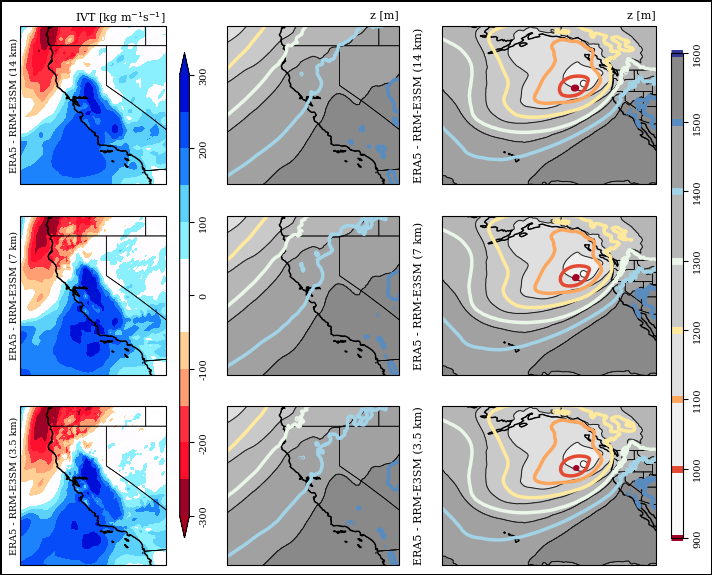

In [10]:
fig = plot_z_dIVT(data, data2, titles, resolutions)
ts = str(E3SM_sfc.isel(time=1).time.values).split(":")[0]
fig.savefig("plots/dIVT_Z_{}.png".format(ts), dpi=300, bbox_inches="tight")
# fig.savefig("plots/dIVT_Z_{}.pdf".format(ts), dpi=300, bbox_inches="tight")

## Cross-sections


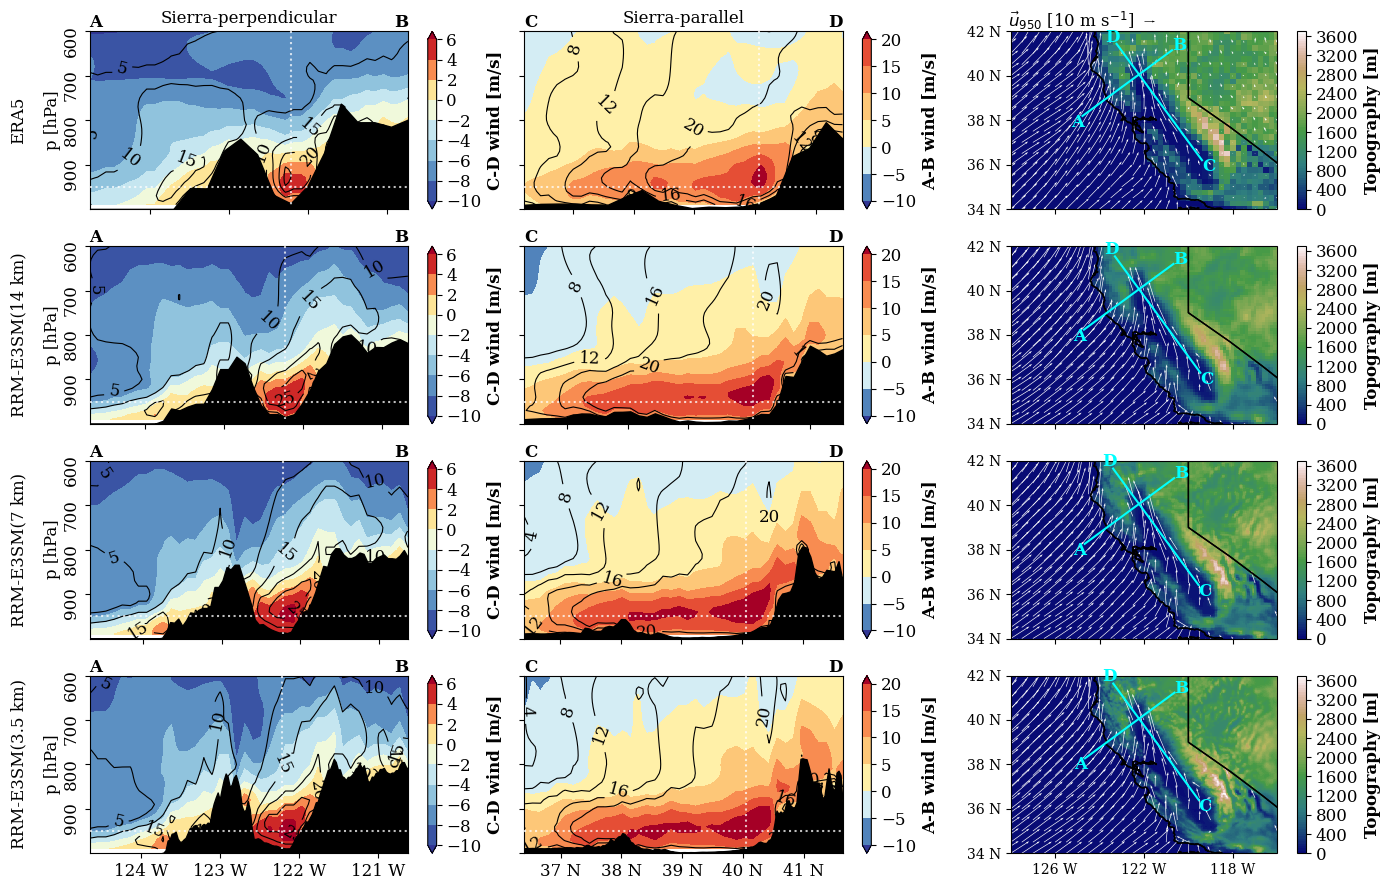

In [11]:
t=0
fig = plot_along_across_transect(ERA5_p, E3SM_p, time=t, fs=12, figsize=(14,9))
fig.tight_layout()
fig.savefig("plots/Cross_section_{}.png".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")
# fig.savefig("plots/Cross_section_{}.pdf".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")

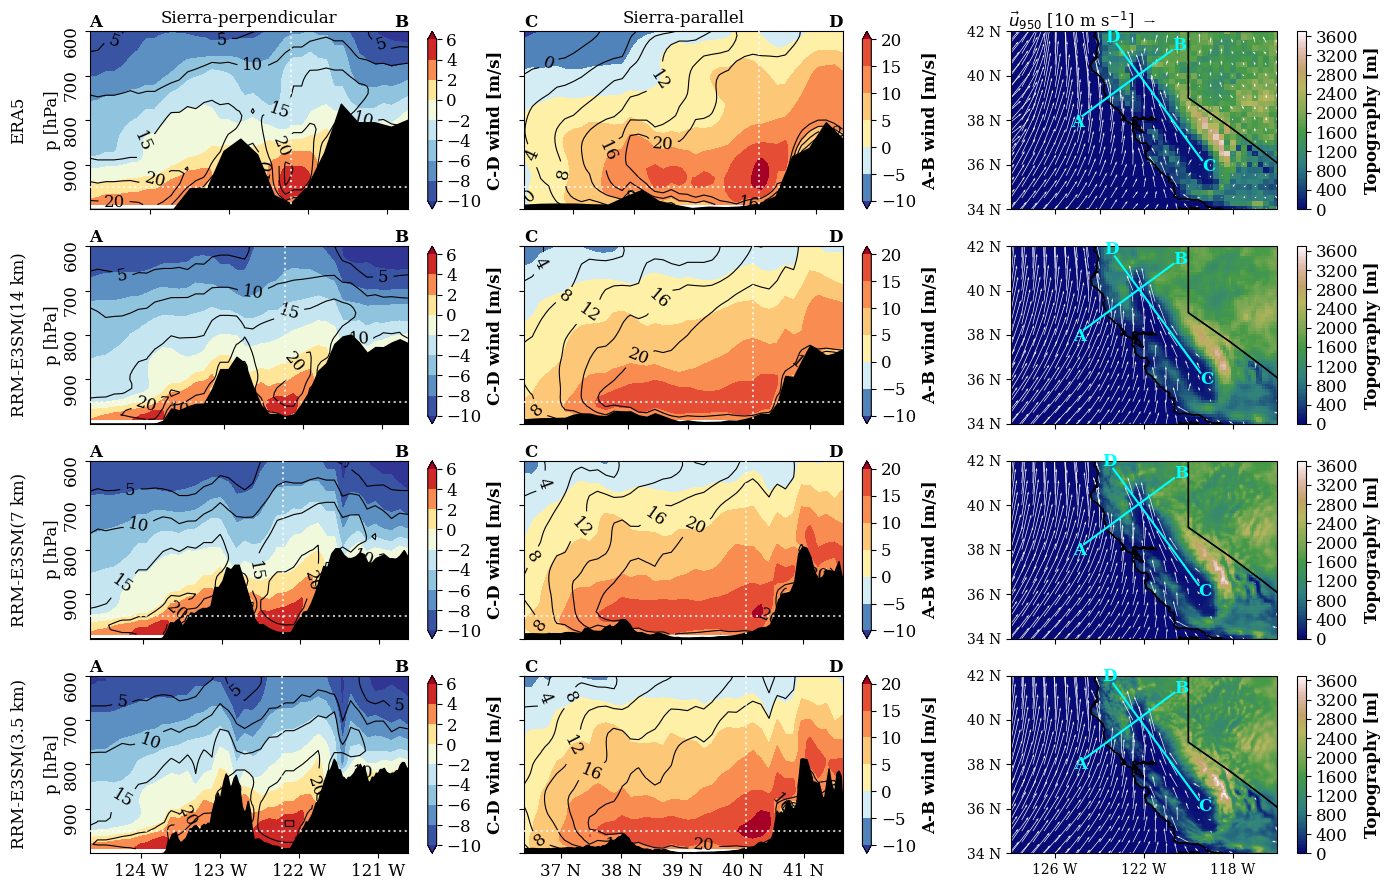

In [12]:
t=1
fig = plot_along_across_transect(ERA5_p, E3SM_p, time=t, fs=12, figsize=(14,9))
fig.tight_layout()
fig.savefig("plots/Cross_section_{}.png".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")
# fig.savefig("plots/Cross_section_{}.pdf".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")

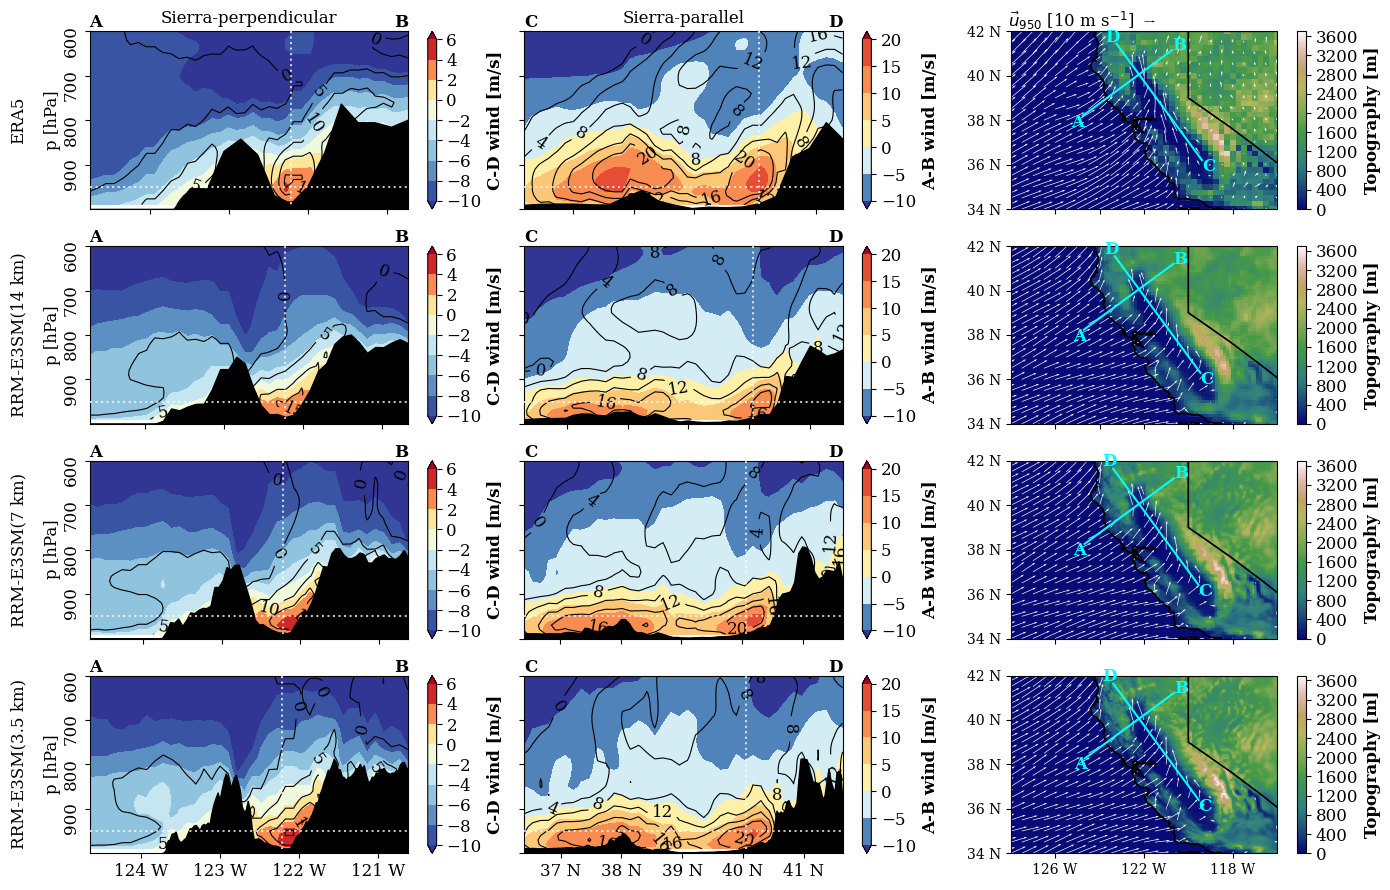

In [13]:
t=2
fig = plot_along_across_transect(ERA5_p, E3SM_p, time=t, fs=12, figsize=(14,9))
fig.tight_layout()
fig.savefig("plots/Cross_section_{}.png".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")
# fig.savefig("plots/Cross_section_{}.pdf".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")

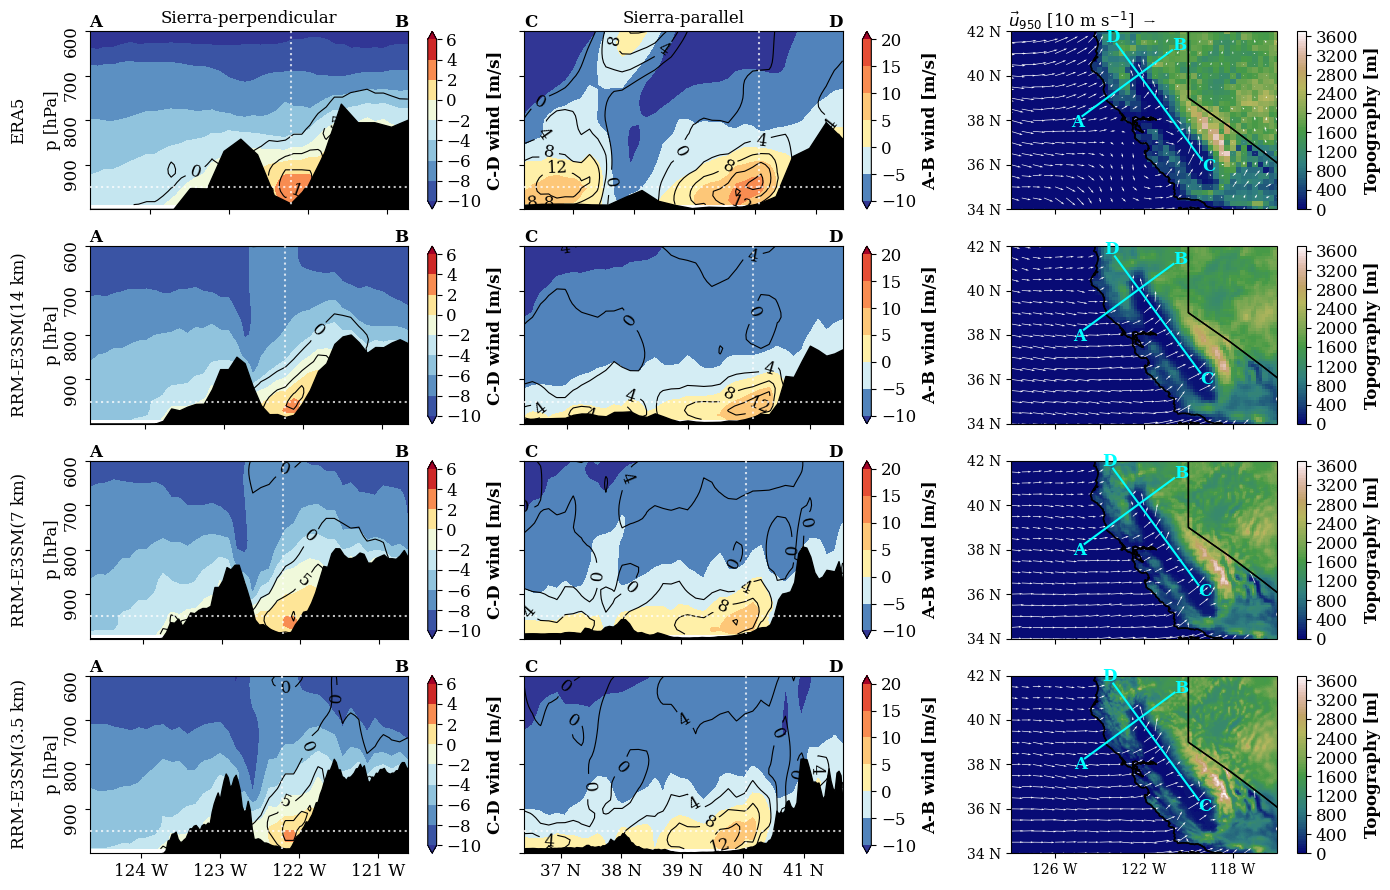

In [14]:
t=3
fig = plot_along_across_transect(ERA5_p, E3SM_p, time=t, fs=12, figsize=(14,9))
fig.tight_layout()
fig.savefig("plots/Cross_section_{}.png".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")
# fig.savefig("plots/Cross_section_{}.pdf".format(str(ERA5_p.time[t].values).split(":")[0]), dpi=300, bbox_inches="tight")

## Vertical profiles


### New colors.  

- RRM-E3SM (3.5km) as dark blue.  
- RRM-E3SM (7 km) will now be green (RGB - 3,250,8; #03FA08).  
- RRM-E3SM (14km) will now be cyan (RGB - 180,218,233; #B4DAE9)

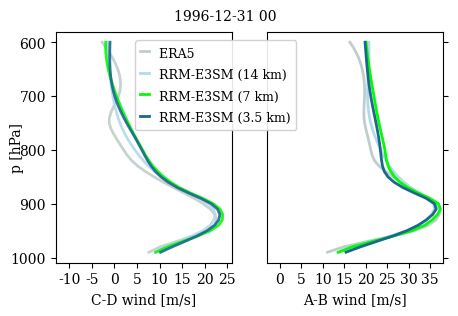

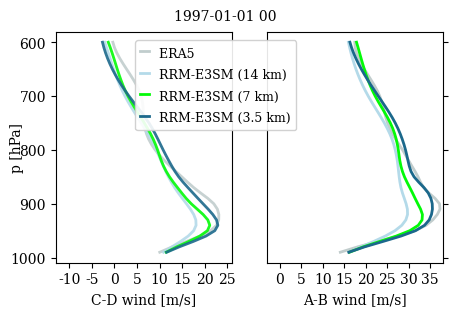

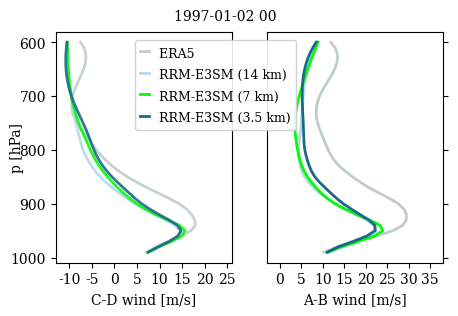

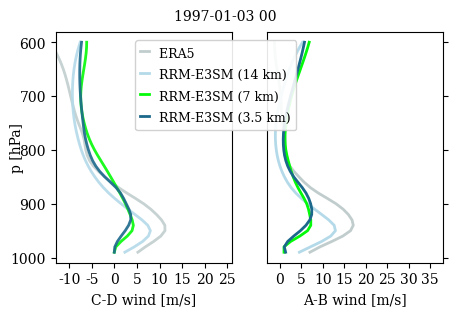

In [15]:
for time in range(4):

    Along,Across,Resolutions = create_AA(ERA5_p, E3SM_p, time=time)
    fig = plot_profile(Along, Across, Resolutions, time=time, fs=10)
    fig.savefig("plots/UV_profiles_{}.png".format(str(Along[-1].time.values).split(":")[0]), dpi=300, bbox_inches="tight")
    # fig.savefig("plots/UV_profiles_{}.pdf".format(str(Along[-1].time.values).split(":")[0]), dpi=300, bbox_inches="tight")

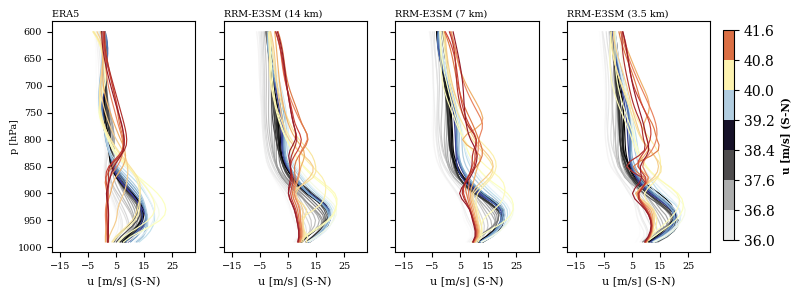

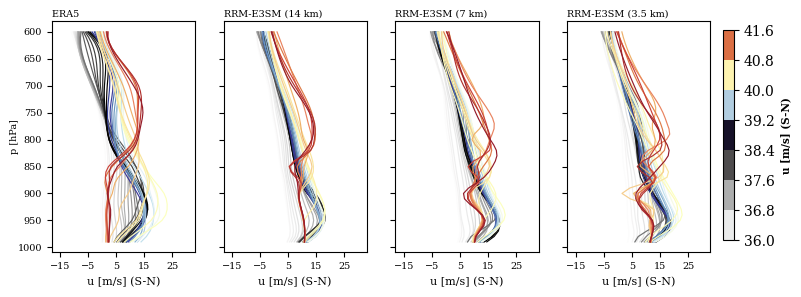

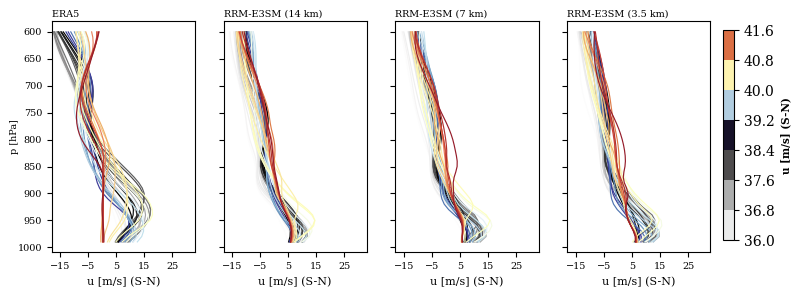

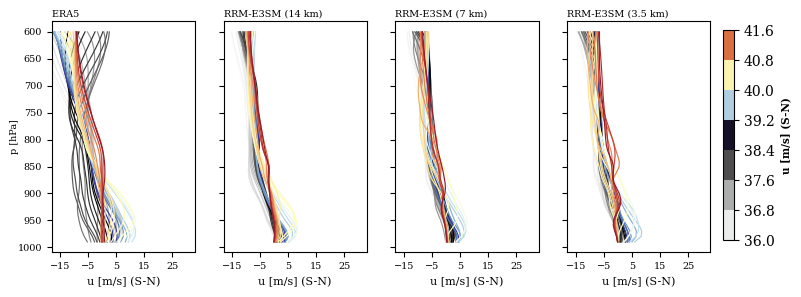

In [16]:
for time in range(4):

    Along,Across,Resolutions = create_AA(ERA5_p, E3SM_p, time=time)
    fig = plot_transect_location(Along, Across, Resolutions, time=time)
    fig.savefig("plots/UV_profiles_locations_{}.png".format(str(Along[-1].time.values).split(":")[0]), dpi=300, bbox_inches="tight")
    # fig.savefig("plots/UV_profiles_locations_{}.pdf".format(str(Along[-1].time.values).split(":")[0]), dpi=300, bbox_inches="tight")